In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel("input/Churn_Modelling.xlsx")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data = data.drop(["RowNumber" , "CustomerId" , "Surname"] , axis = 1)

In [6]:
from sklearn.preprocessing import LabelEncoder
d_types = dict(data.dtypes)
for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

In [7]:
remaining_columns = list(data.columns)
remaining_columns.remove("Exited")

In [8]:
X = data[remaining_columns].values 
Y = data['Exited'].values.astype(np.uint8)

In [9]:
from sklearn.model_selection import train_test_split

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [10]:
print(Xtrain.shape , Ytrain.shape)

(8000, 10) (8000,)


In [11]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier()
model.fit(Xtrain , Ytrain)

DecisionTreeClassifier()

In [12]:
print("Testing Accuracy : " , model.score(Xtest , Ytest))

Testing Accuracy :  0.7895


In [13]:
predictions = model.predict(Xtest)

In [14]:
from sklearn.metrics import confusion_matrix 

matrix = confusion_matrix(Ytest , predictions)
matrix

array([[1378,  226],
       [ 195,  201]], dtype=int64)

Improve

In [15]:
value_counts = dict(data["Exited"].value_counts())
print(value_counts)

{0: 7963, 1: 2037}


In [16]:
for key , value in value_counts.items():
    value_counts[key] = value/len(data)

print(value_counts)

{0: 0.7963, 1: 0.2037}


In [17]:
class_weights = {}

for key , value in value_counts.items():
    class_weights[key] = sum(value_counts.values()) - value / sum(value_counts.values())

class_weights

{0: 0.2037, 1: 0.7963}

In [18]:
model = DecisionTreeClassifier(max_depth = 8 , class_weight = class_weights)
model.fit(Xtrain , Ytrain)

DecisionTreeClassifier(class_weight={0: 0.2037, 1: 0.7963}, max_depth=8)

In [19]:
print("Testing Accuracy : " , model.score(Xtest , Ytest))

Testing Accuracy :  0.782


In [20]:
predictions = model.predict(Xtest)

In [21]:
from sklearn.metrics import confusion_matrix 

matrix = confusion_matrix(Ytest , predictions)
matrix

array([[1270,  334],
       [ 102,  294]], dtype=int64)

Visualizing Tree

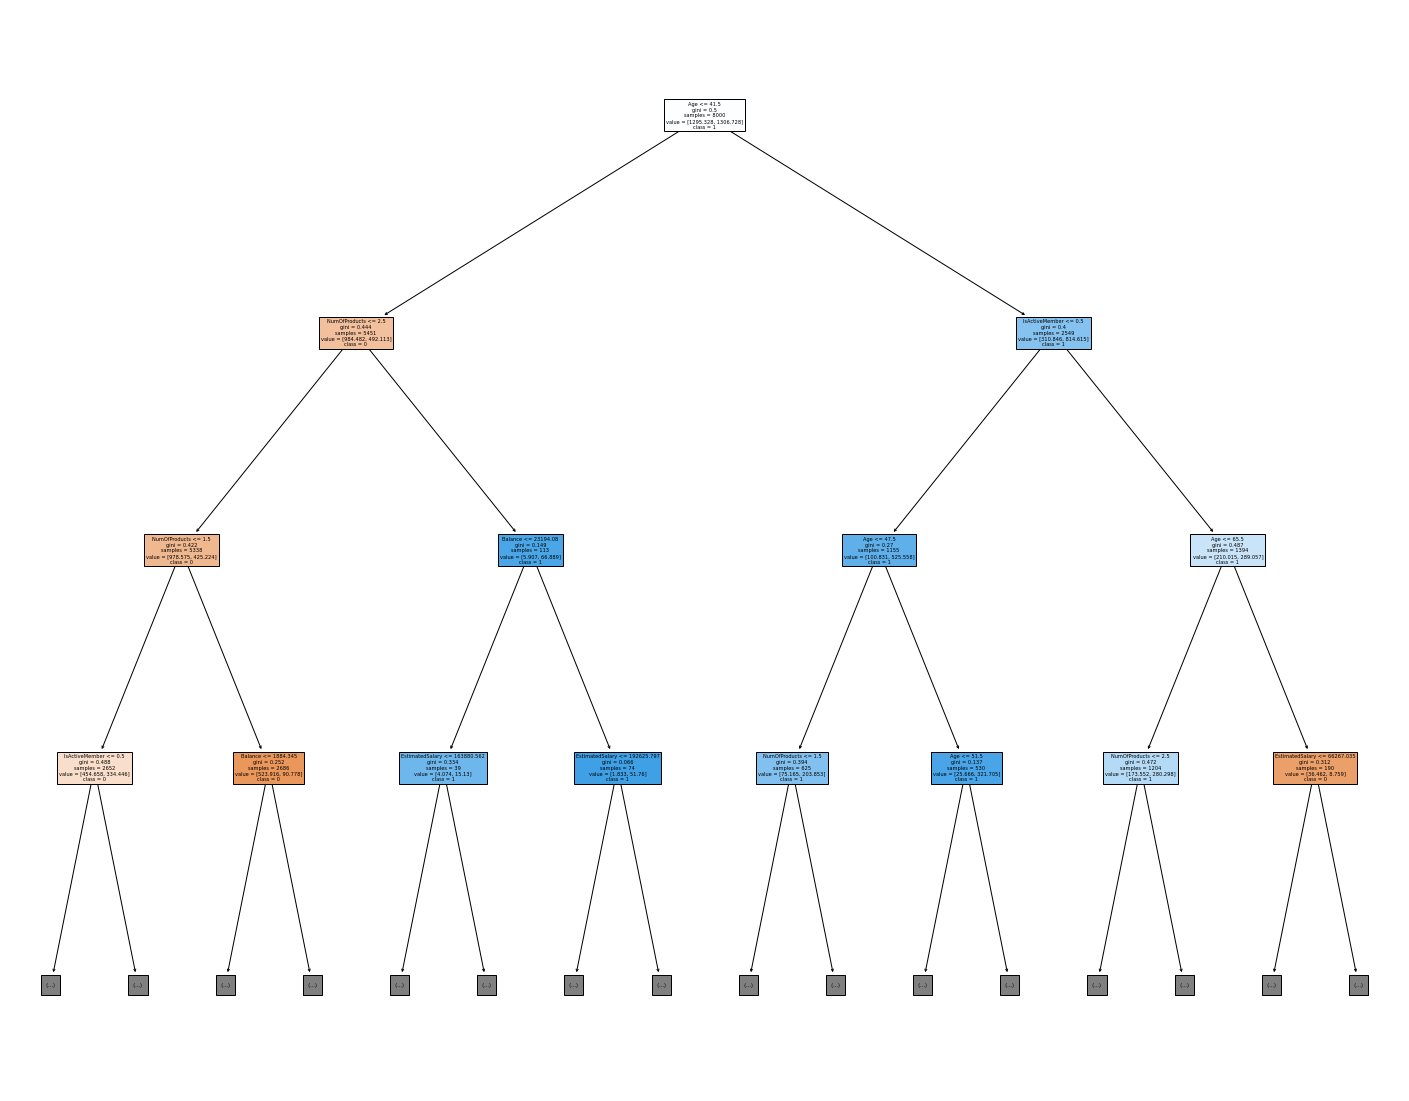

In [22]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   max_depth=3,
                   feature_names=data.columns[:-1],  
                   class_names=['0','1'],
                   filled=True)